<a href="https://colab.research.google.com/github/Rebecca-ZYC/test1-defect-detection/blob/main/train_30_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install ultralytics

In [9]:
# Pip install method (recommended)

%pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (16 CPUs, 62.8 GB RAM, 29.0/201.2 GB disk)


In [10]:
model = YOLO("yolov8m.pt")

In [11]:
%pip install roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="DGyQ22FNjGMfKaM1yYPv")
project = rf.workspace("zhuyichen-ci").project("steel-surface-defect-detection-kowae")
version = project.version(1)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Steel-Surface-Defect-Detection-1 in yolov8:: 100%|██████████| 3566/3566 [00:00<00:00, 10348.70it/s]


In [12]:
import os
%cd Steel-Surface-Defect-Detection-1
dataset_path = (os.getcwd()+ '/data.yaml')
print(dataset_path)

/content/Steel-Surface-Defect-Detection-1
/content/Steel-Surface-Defect-Detection-1/data.yaml


In [13]:
results = model.train(data=dataset_path,
                      epochs=30,  # Number of epochs
                      imgsz=640,   # Input image size
                      batch=8,     # Batch size
                      workers=4,   # Number of workers
                      name="steel_defect_detection")

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Steel-Surface-Defect-Detection-1/data.yaml, epochs=30, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=steel_defect_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width

In [15]:
metrics = model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Steel-Surface-Defect-Detection-1/valid/labels.cache... 266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Steel-Surface-Defect-Detection-1/valid/images/inclusion_62_jpg.rf.2e82e05853e7e717c878d71a2d2173d6.jpg: 1 duplicate labels removed
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.77it/s]
                   all        266        627      0.677      0.686      0.744      0.424
               crazing        266        106      0.557       0.17      0.337      0.131
             inclusion        266        151      0.707      

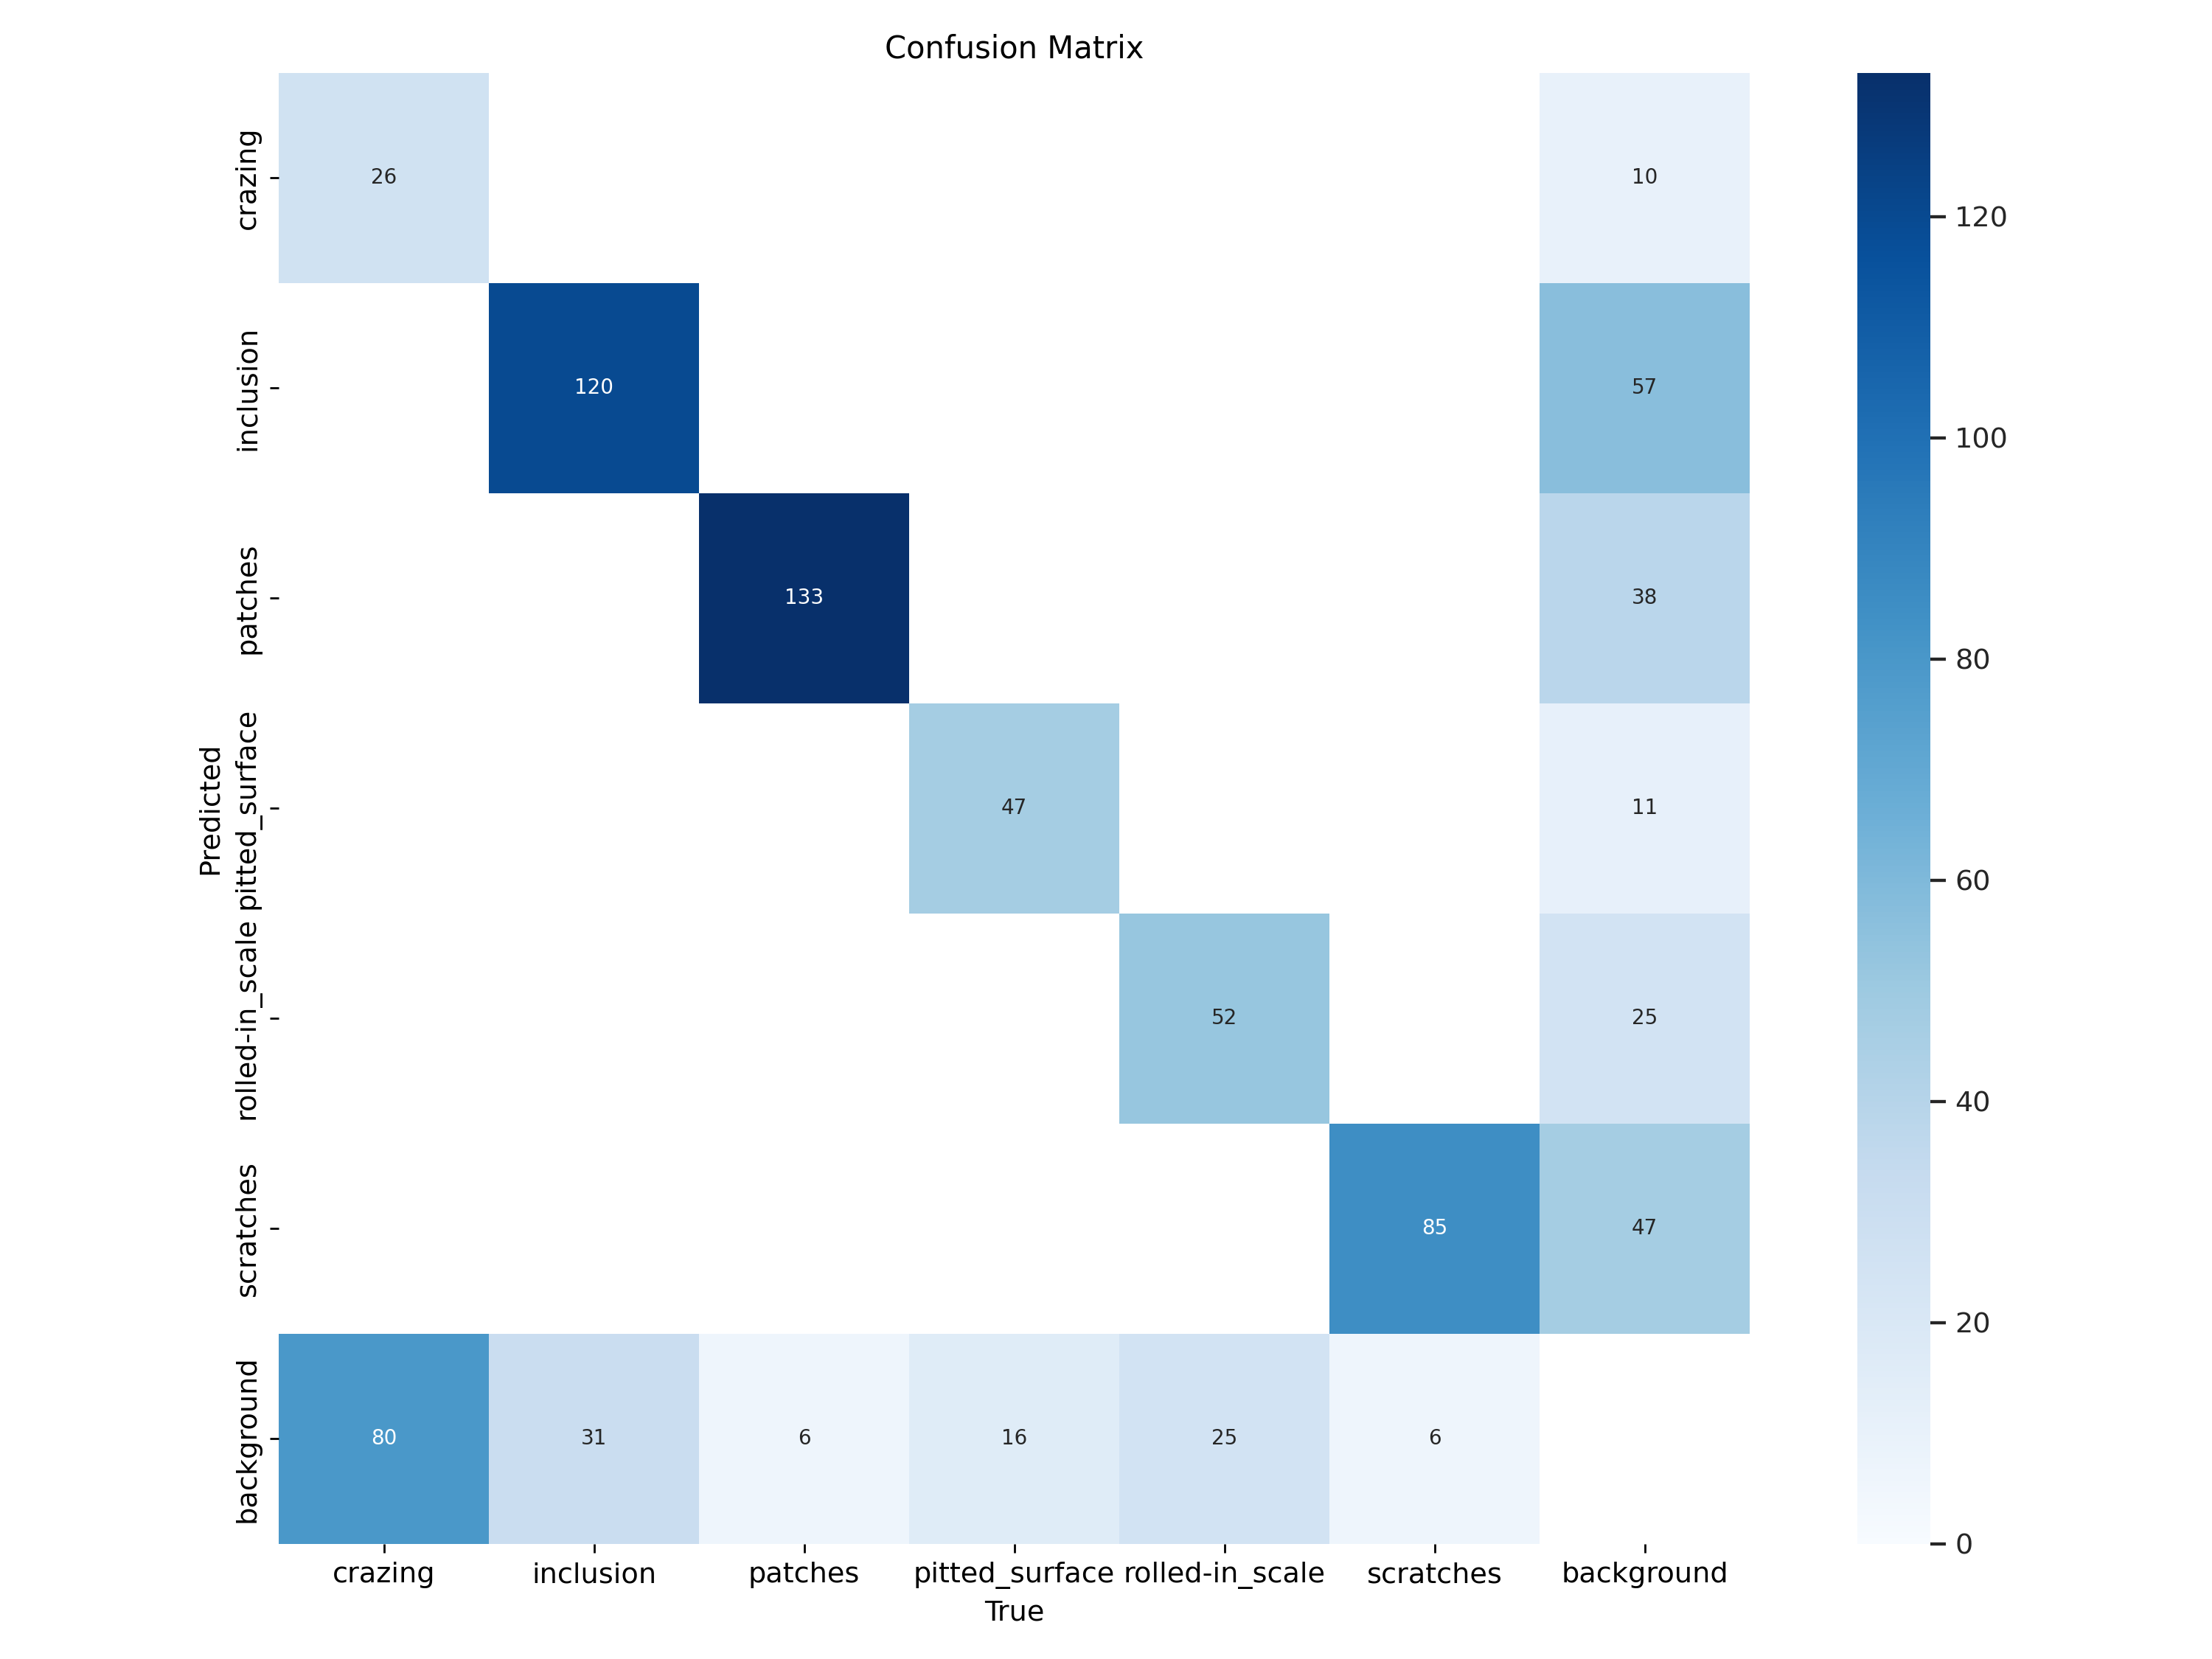

In [18]:
from IPython.display import display, Image
os.getcwd()
Image(filename=f'runs/detect/steel_defect_detection2/confusion_matrix.png', width=600)

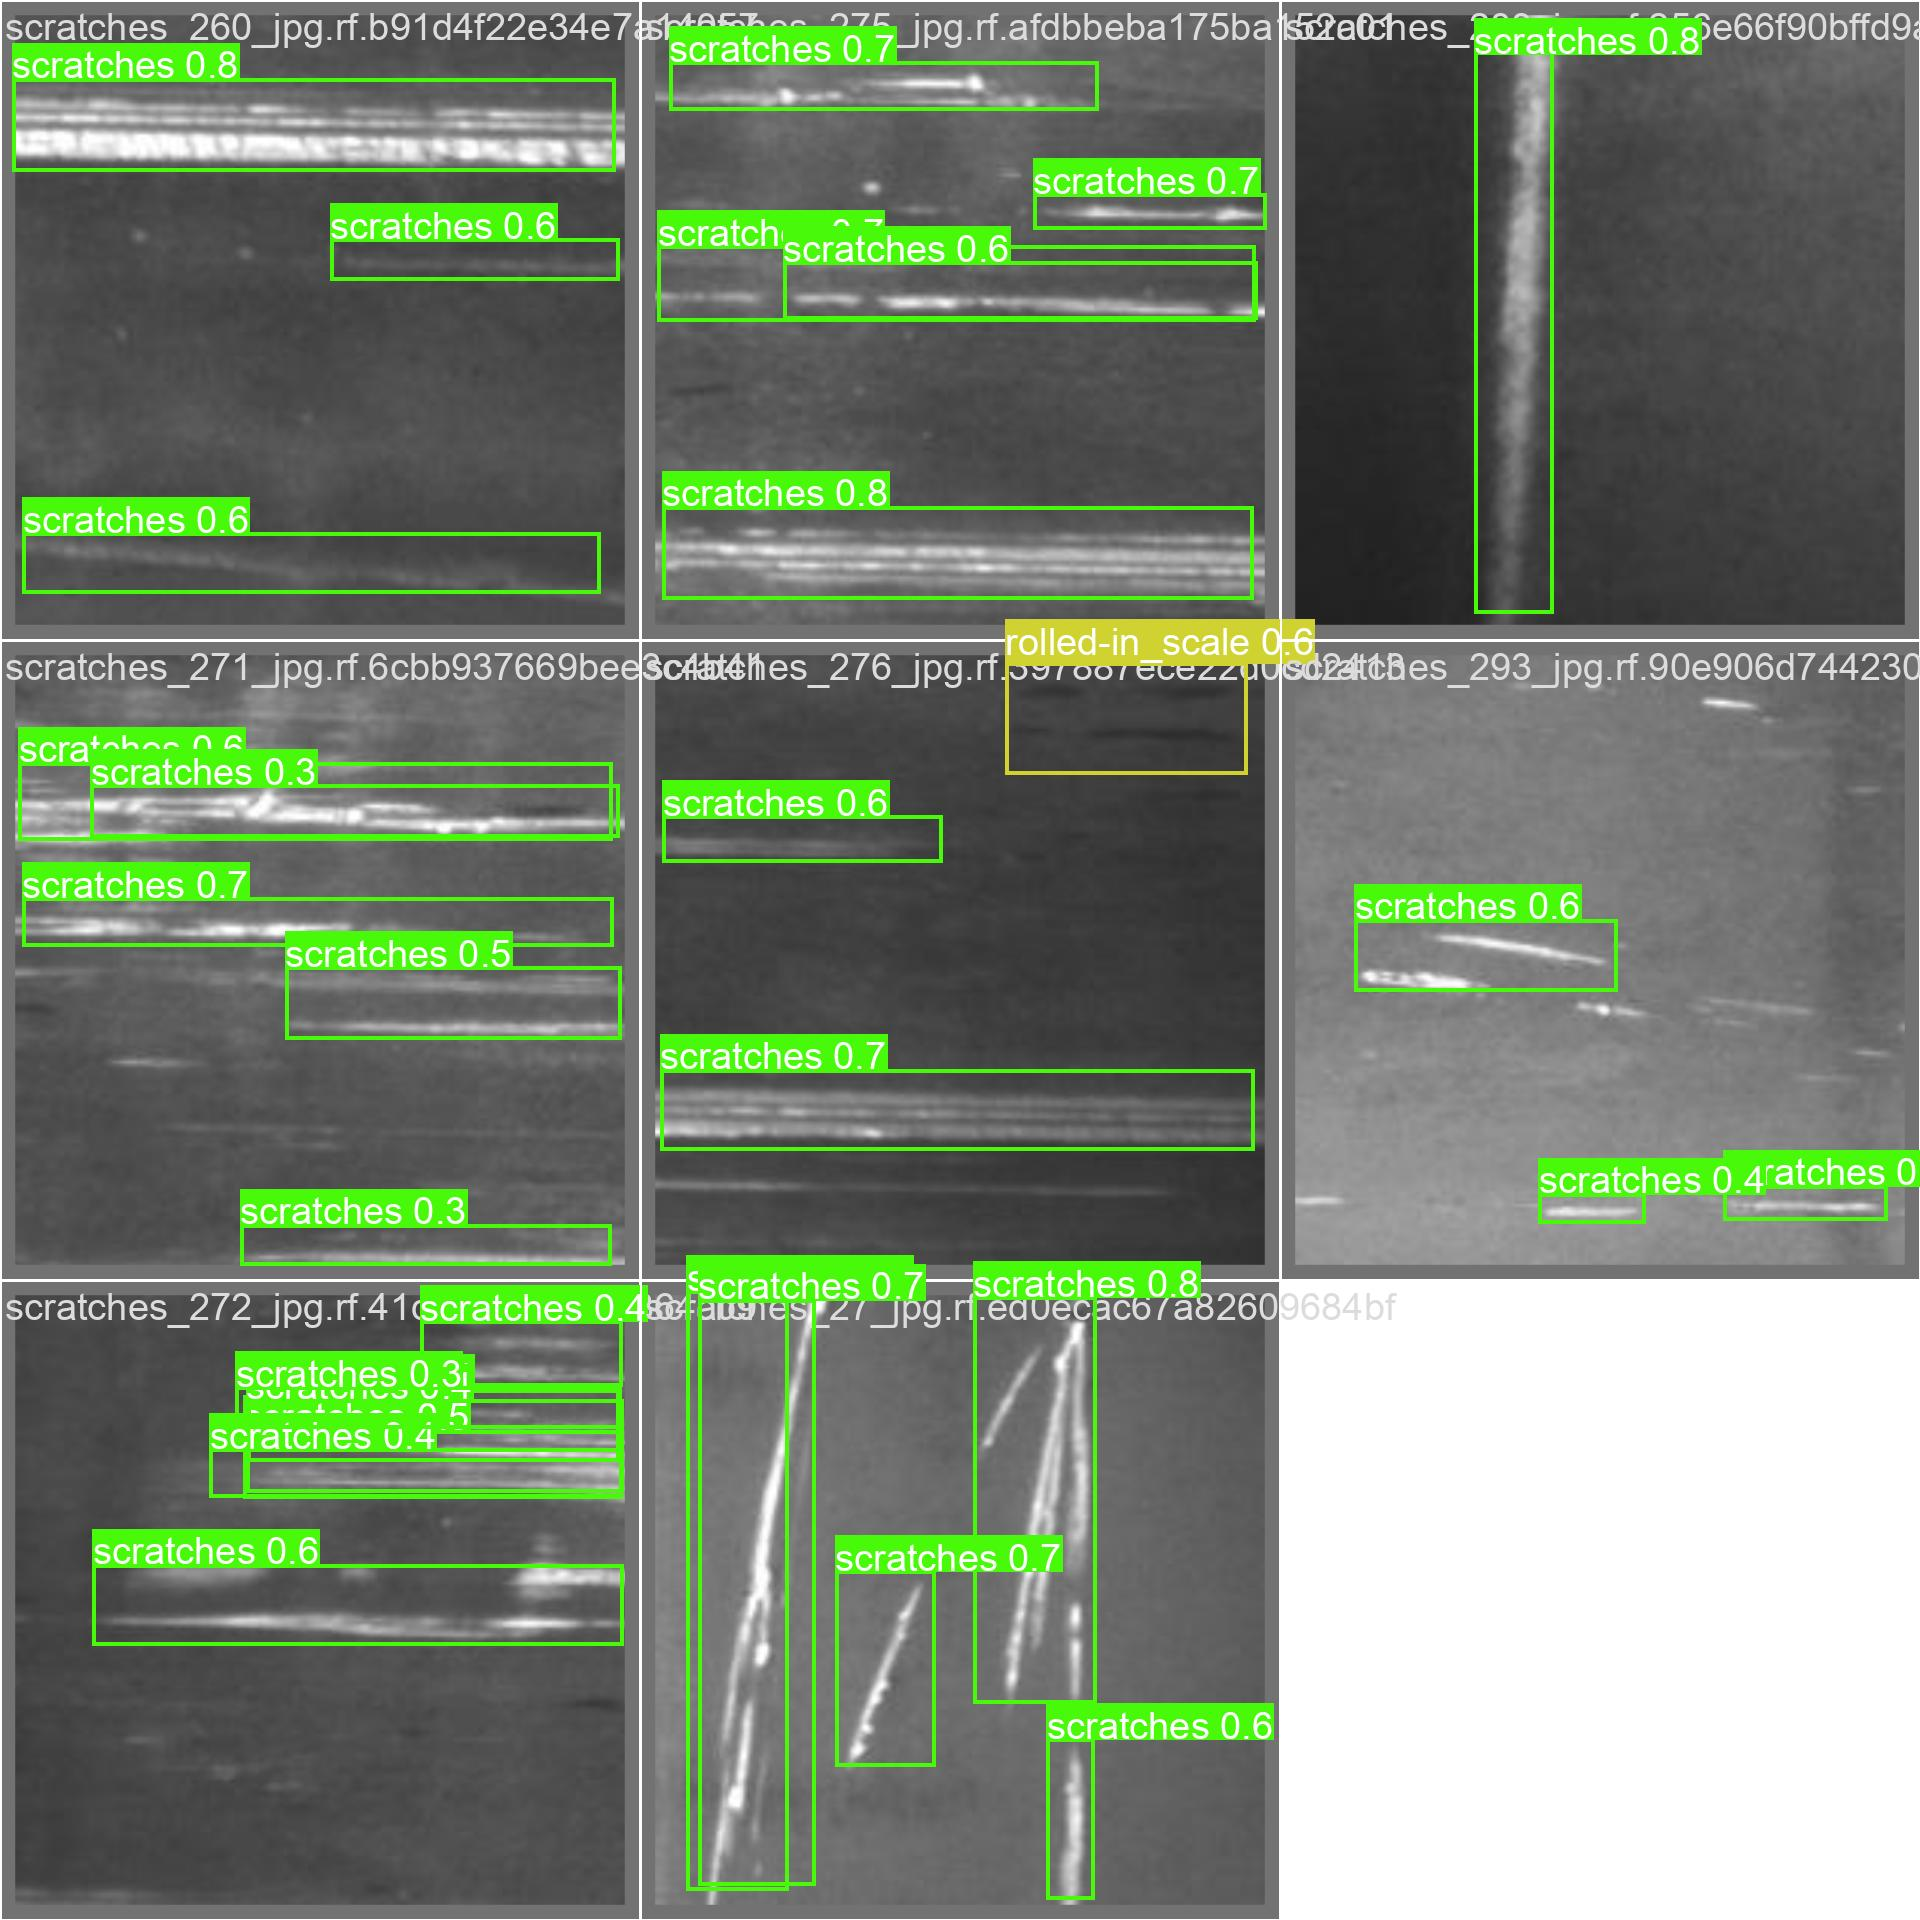

In [19]:
Image(filename=f'runs/detect/steel_defect_detection2/val_batch0_pred.jpg', width=600)

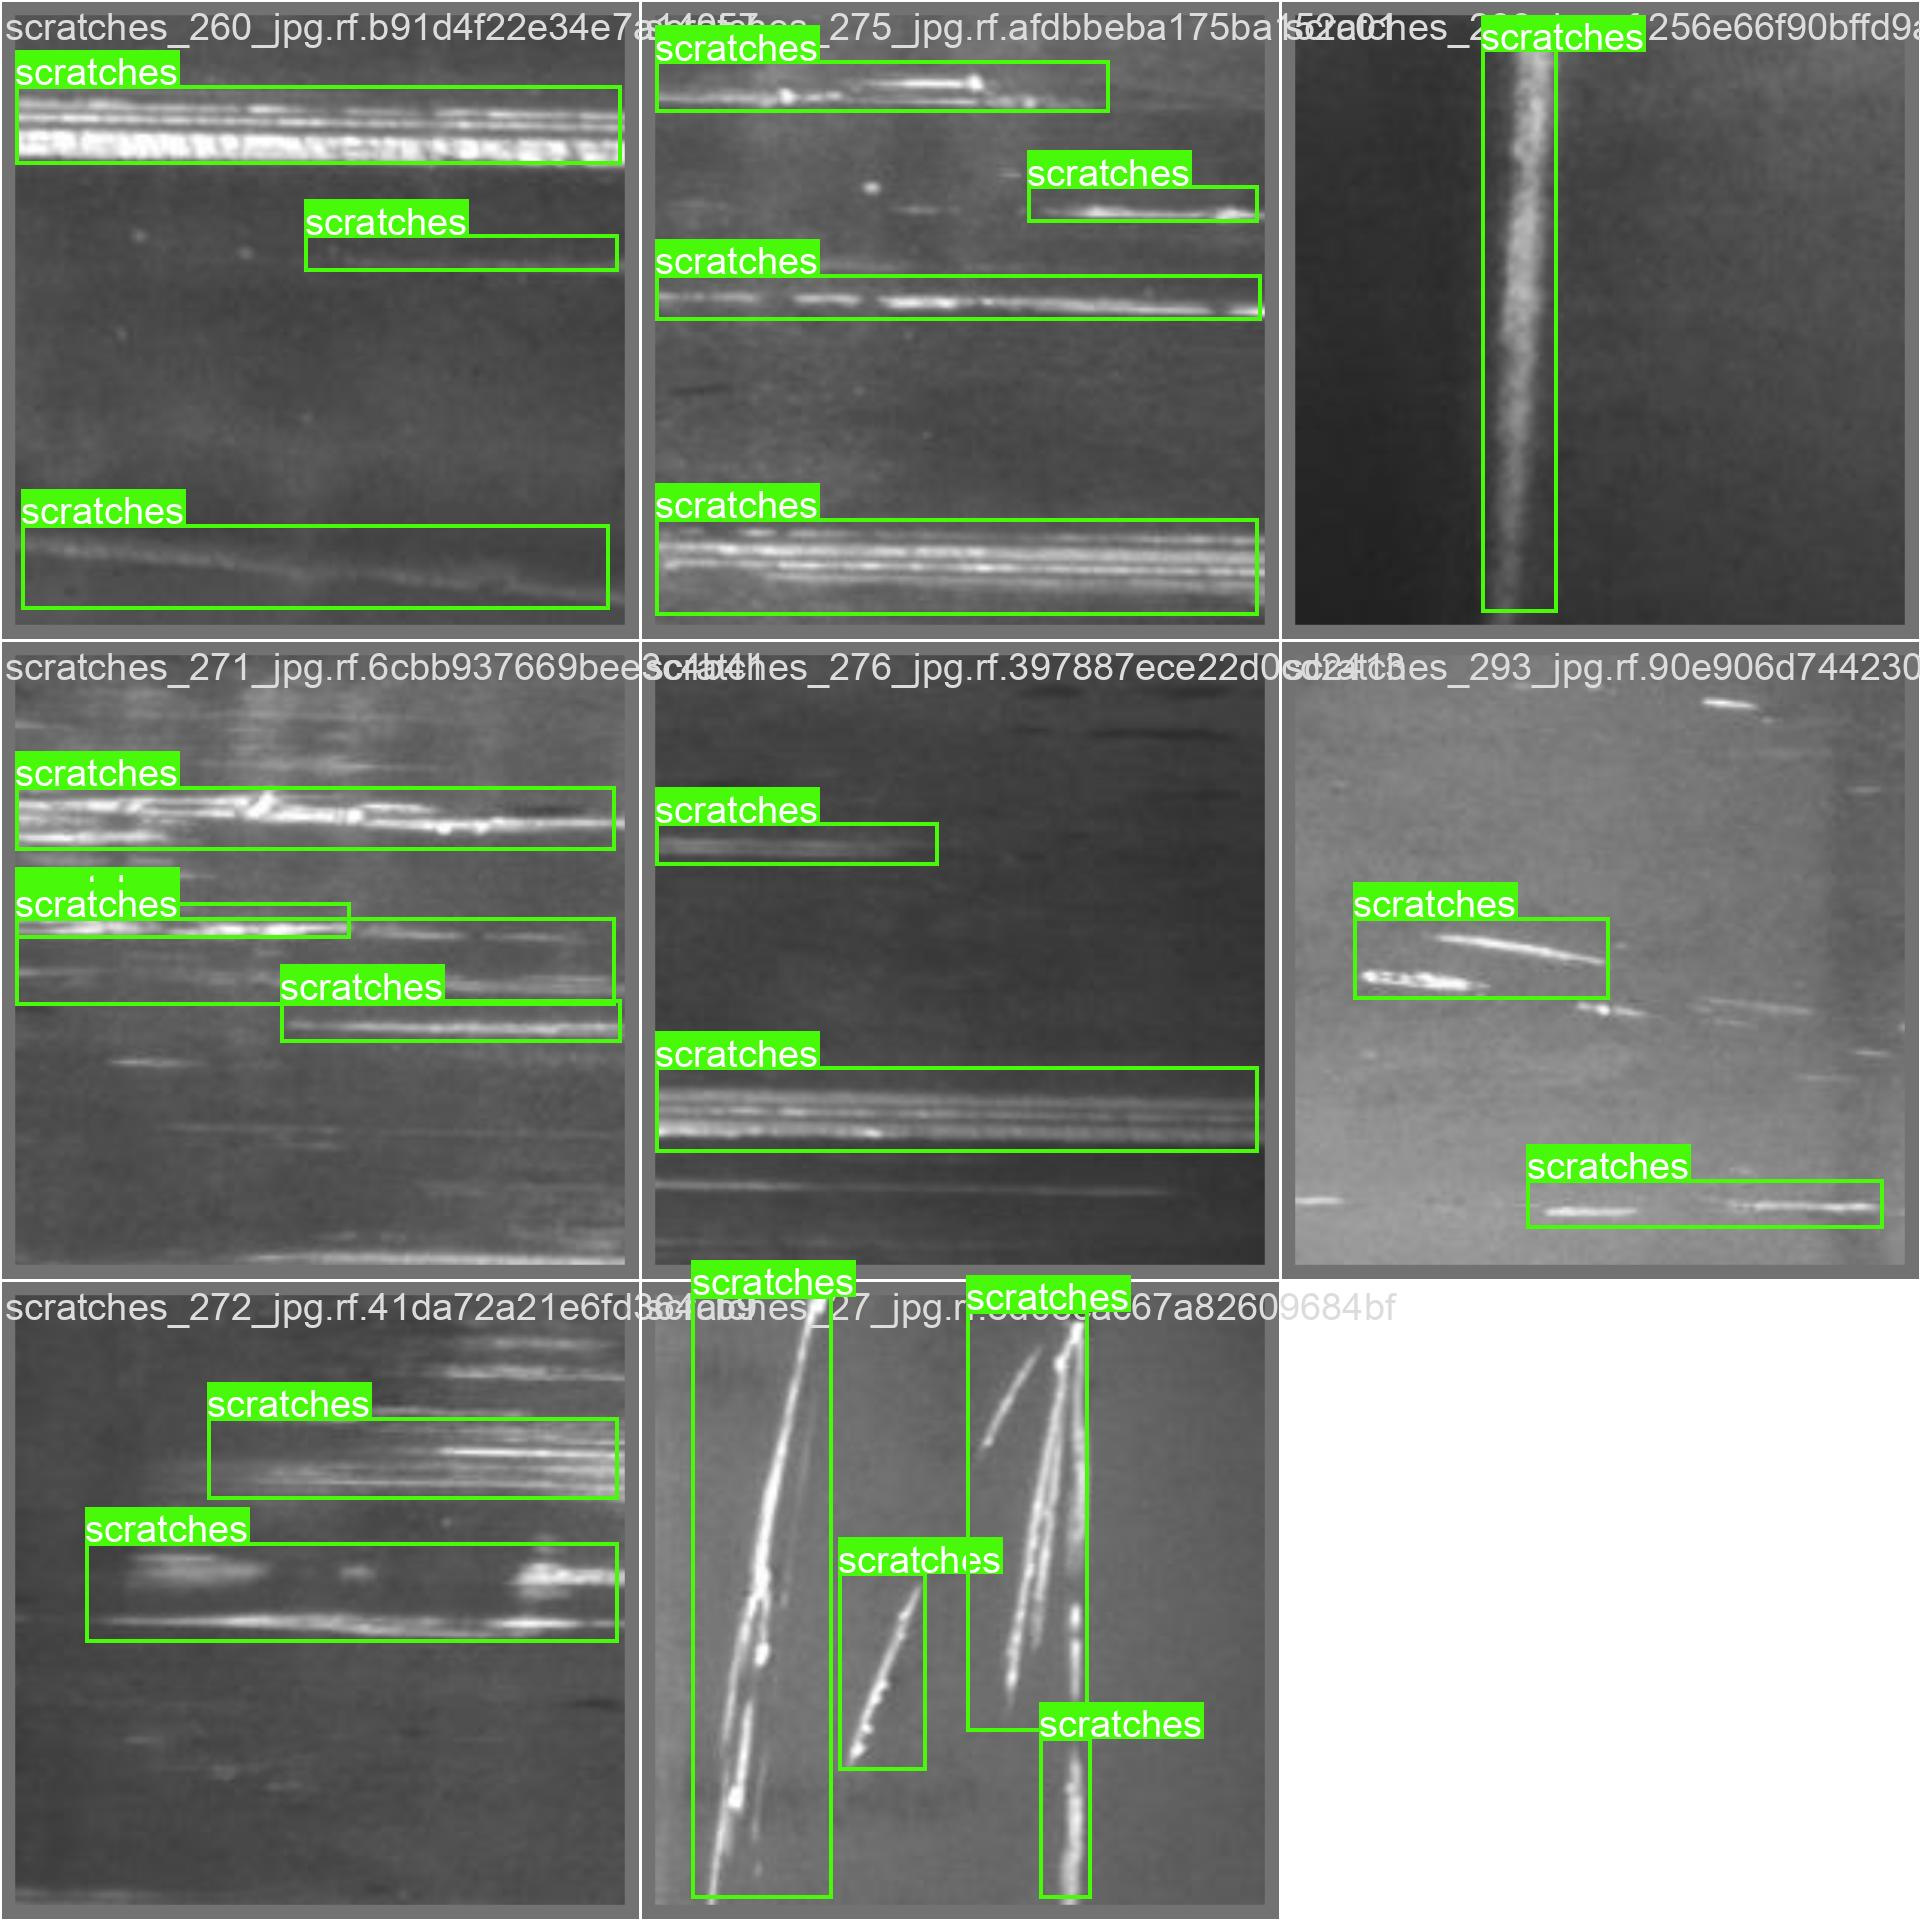

In [72]:
Image(filename=f'runs/detect/steel_defect_detection2/val_batch0_labels.jpg', width=600)

Add data preprocessing, augmentation and modify hyperparameters

In [43]:
from tqdm import tqdm
import torch
import albumentations as A
import torch.nn as nn

In [53]:
# Define data augmentation transforms
train_transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
    A.RandomGamma(p=0.2, gamma_limit=(80, 120)),
], bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))


locale encoding to be set to UTF-8

In [39]:
import locale
try:
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
except locale.Error:
    print('Error setting locale')

In [60]:
class AlbumentationsTransform:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img, labels=None):
        img_aug = self.transforms(image=np.array(img))['image']
        img_aug = img_aug.astype(np.uint8)

        if labels is not None:
            labels[:, 1:] = xywh2xyxy(labels[:, 1:])
            labels[:, 1:] = self.transforms(image=img, bboxes=labels[:, 1:])['bboxes']
            labels[:, 1:] = xyxy2xywh(labels[:, 1:])

        return img_aug, labels

In [61]:
def apply_albumentations_transform(img, labels=None):
    if labels is not None:
        labels[:, 1:] = xywh2xyxy(labels[:, 1:])
        transformed = train_transforms(image=img, bboxes=labels[:, 1:])
        img = transformed['image']
        labels[:, 1:] = transformed['bboxes']
        labels[:, 1:] = xyxy2xywh(labels[:, 1:])
    else:
        transformed = train_transforms(image=img)
        img = transformed['image']
    return img, labels

In [44]:
class FPN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FPN, self).__init__()
        self.inner_conv_1 = nn.Conv2d(in_channels[0], out_channels, kernel_size=1, stride=1, padding=0)
        self.inner_conv_2 = nn.Conv2d(in_channels[1], out_channels, kernel_size=1, stride=1, padding=0)
        self.inner_conv_3 = nn.Conv2d(in_channels[2], out_channels, kernel_size=1, stride=1, padding=0)

        self.upsample_1 = nn.Upsample(scale_factor=2, mode='nearest')
        self.upsample_2 = nn.Upsample(scale_factor=4, mode='nearest')

        self.outer_conv_1 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.outer_conv_2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.outer_conv_3 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, inputs):
        feature_map_1, feature_map_2, feature_map_3 = inputs

        inner_feature_1 = self.inner_conv_1(feature_map_1)
        inner_feature_2 = self.inner_conv_2(feature_map_2)
        inner_feature_3 = self.inner_conv_3(feature_map_3)

        upsampled_feature_2 = self.upsample_1(inner_feature_2)
        upsampled_feature_3 = self.upsample_2(inner_feature_3)

        outer_feature_1 = self.outer_conv_1(inner_feature_1)
        outer_feature_2 = self.outer_conv_2(inner_feature_2 + upsampled_feature_3)
        outer_feature_3 = self.outer_conv_3(feature_map_3 + upsampled_feature_2)

        return outer_feature_1, outer_feature_2, outer_feature_3

In [57]:
albumentations_transform = AlbumentationsTransform(train_transforms)

In [45]:
# Get the input channels for the FPN module
in_channels = [256, 512, 1024]  # Adjust based on your model's feature map channels
out_channels = 256  # Desired output channel size

# Replace the neck module with the FPN module
model.model.model[1] = FPN(in_channels, out_channels)

In [49]:

head = model.model.model[2]
print(model.model.model[2])

head.cv1.conv.in_channels = out_channels

C2f(
  (cv1): Conv(
    (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
    (act): SiLU(inplace=True)
  )
  (cv2): Conv(
    (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
    (act): SiLU(inplace=True)
  )
  (m): ModuleList(
    (0-1): 2 x Bottleneck(
      (cv1): Conv(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
    )
  )
)


In [63]:
results = model.train(data=dataset_path,
                      epochs=30,
                      imgsz=640,
                      batch=16,
                      workers=4,
                      name="yolov8_with_fpn")


New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Steel-Surface-Defect-Detection-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8_with_fpn, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [64]:
metrics = model.val()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 218 layers, 25843234 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Steel-Surface-Defect-Detection-1/valid/labels.cache... 266 images, 0 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Steel-Surface-Defect-Detection-1/valid/images/inclusion_62_jpg.rf.2e82e05853e7e717c878d71a2d2173d6.jpg: 1 duplicate labels removed
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.76it/s]
                   all        266        627      0.703      0.704      0.763      0.439
               crazing        266        106      0.482      0.255      0.406      0.144
             inclusion        266        151       0.72      

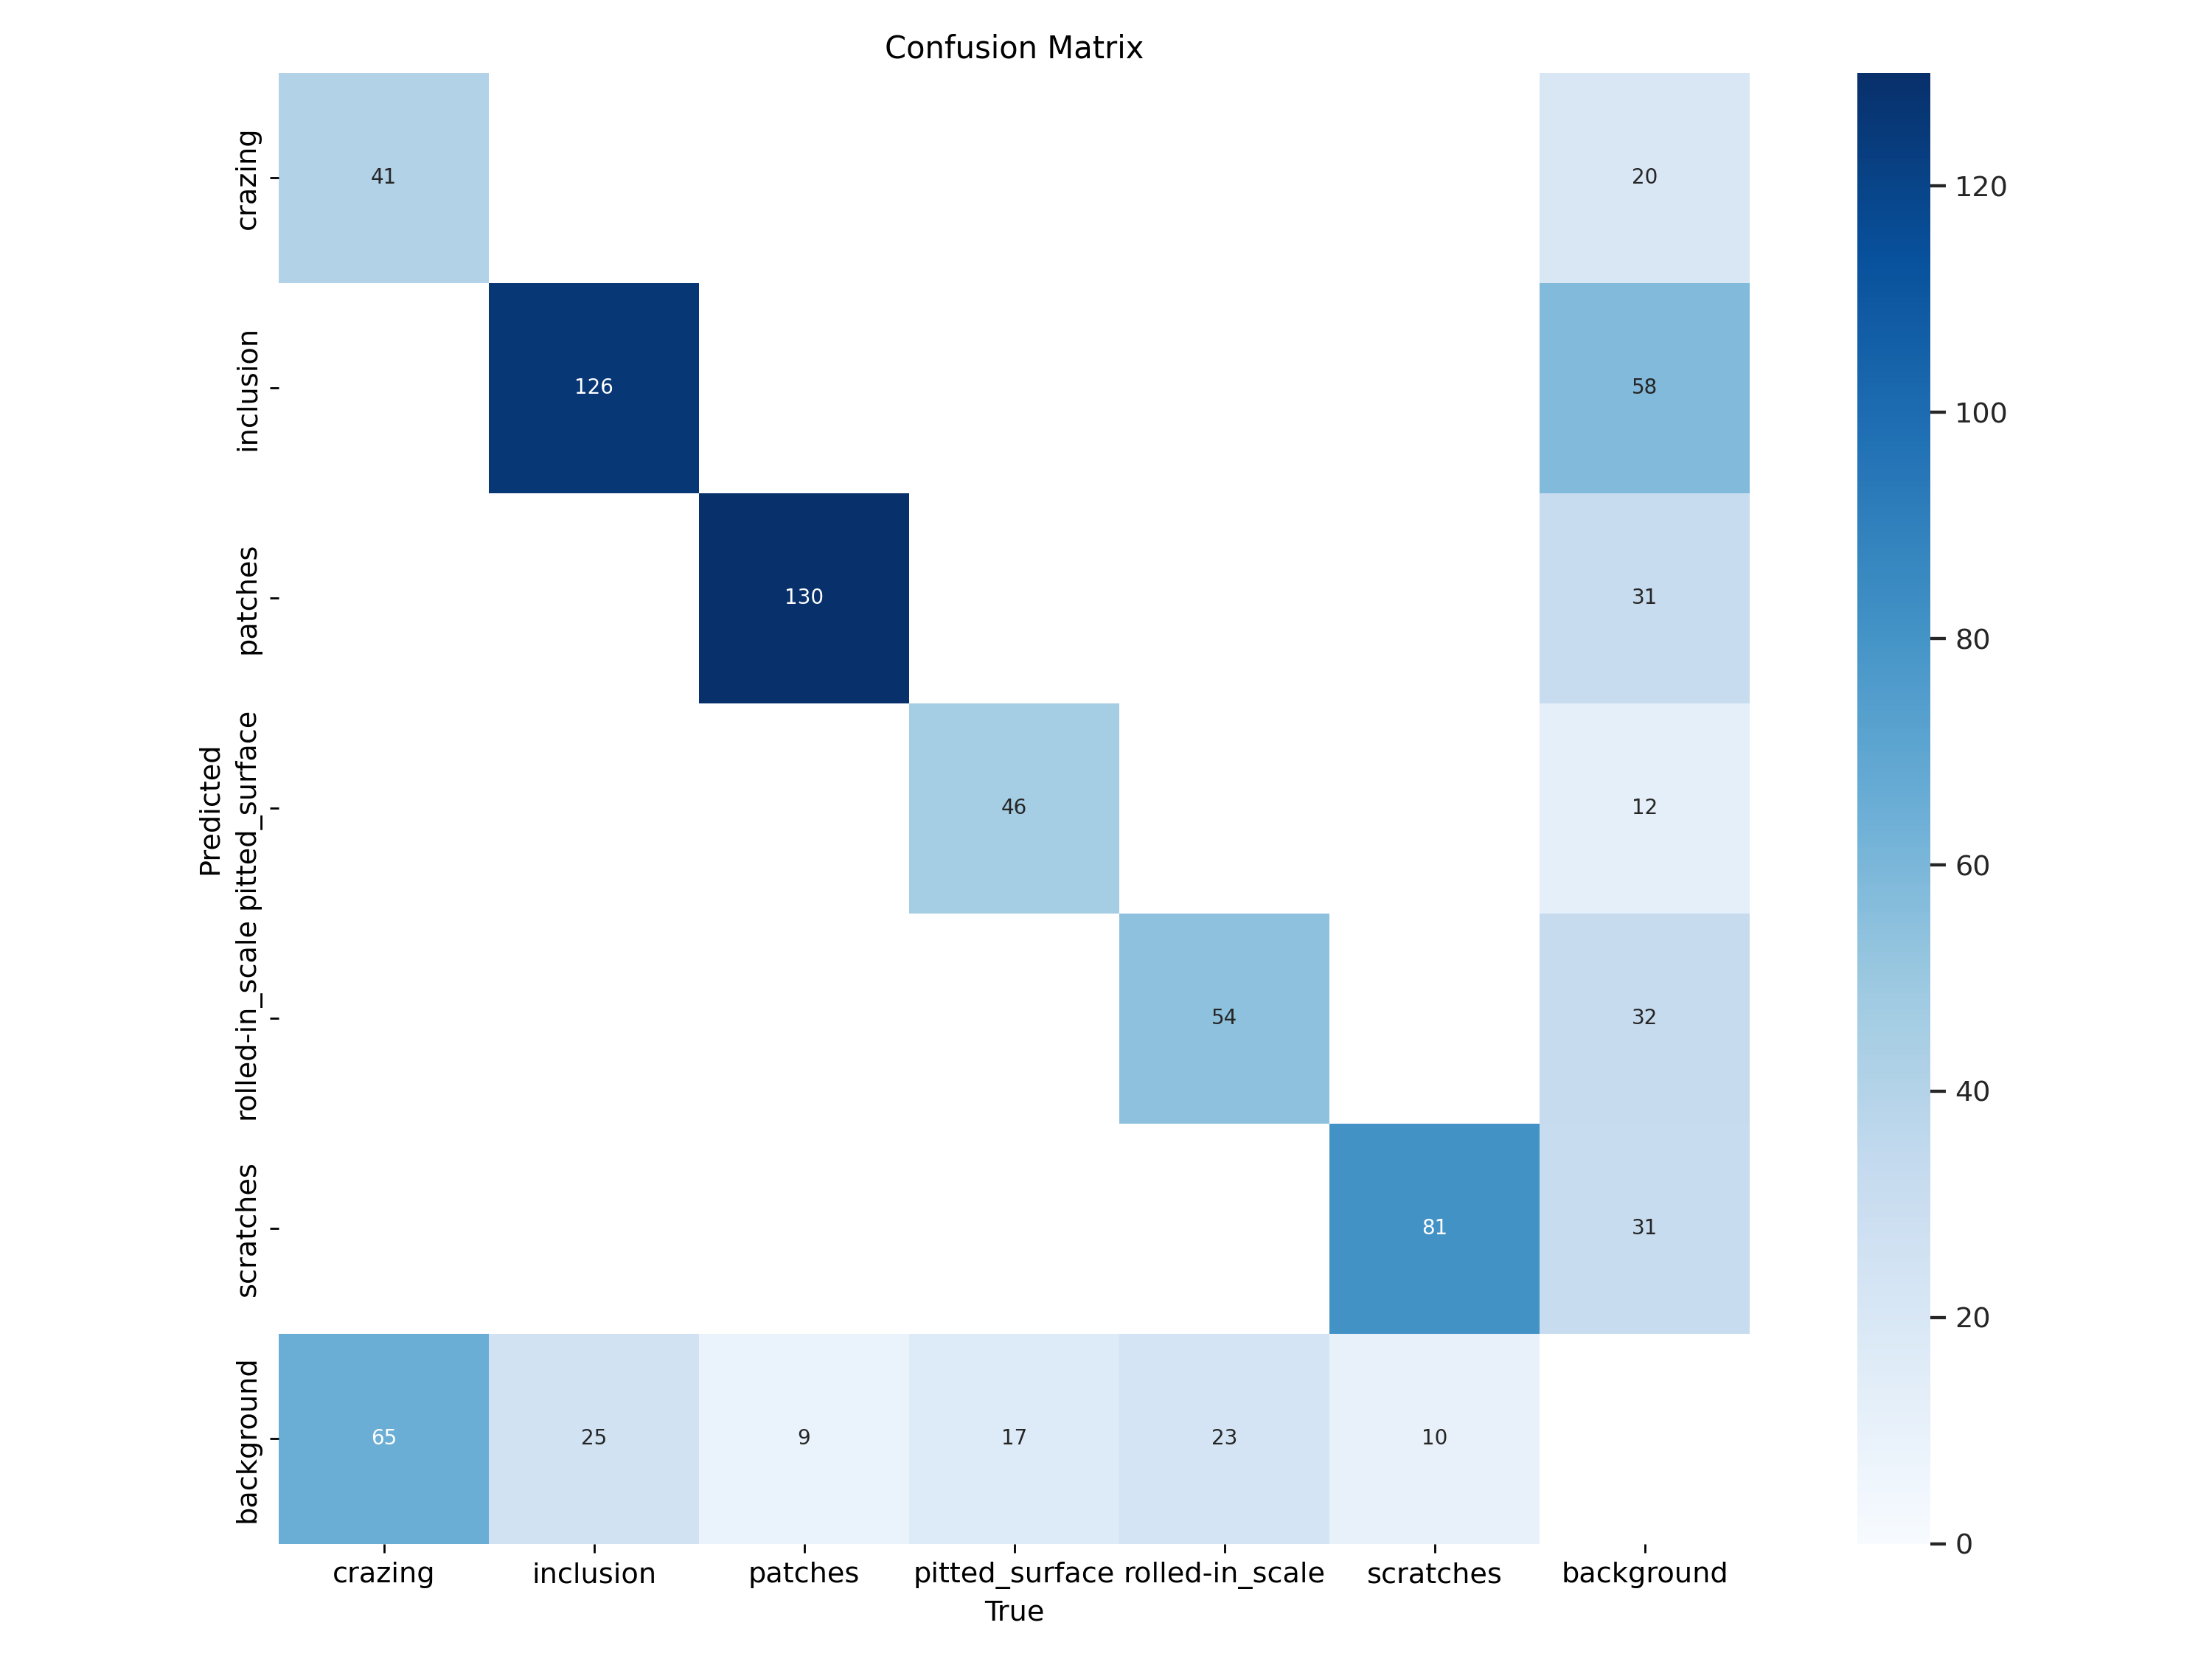

In [65]:
Image(filename=f'runs/detect/yolov8_with_fpn/confusion_matrix.png', width=600)

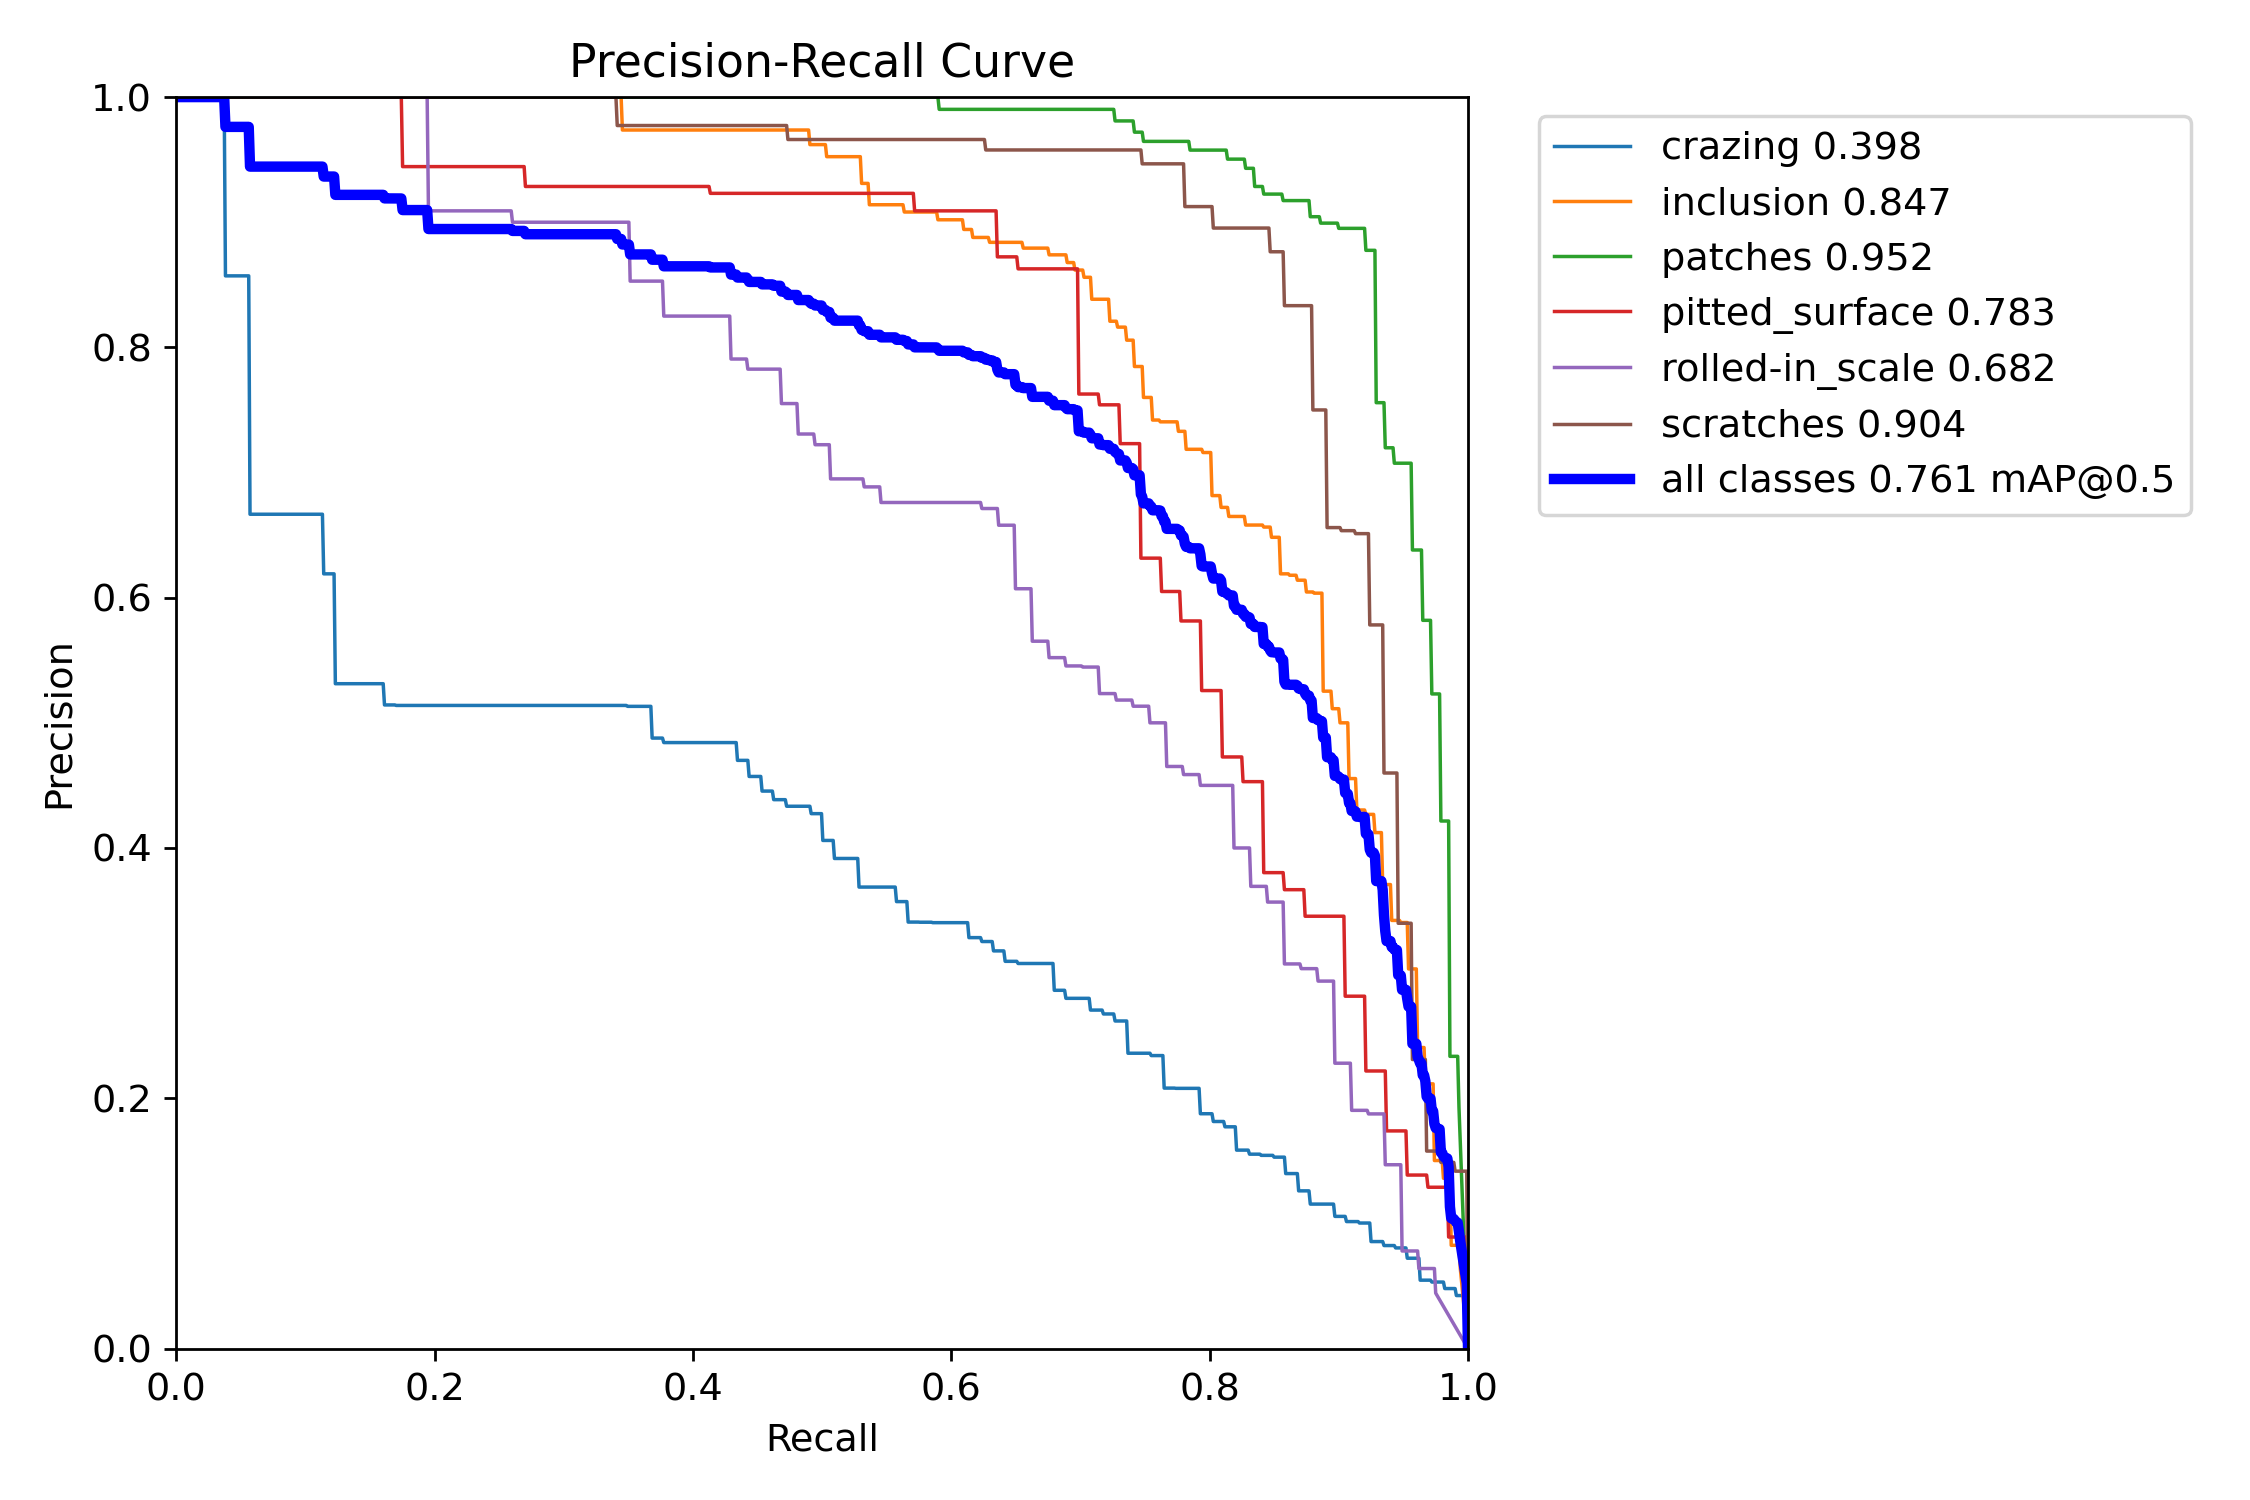

In [66]:
Image(filename=f'runs/detect/yolov8_with_fpn/PR_curve.png', width=600)

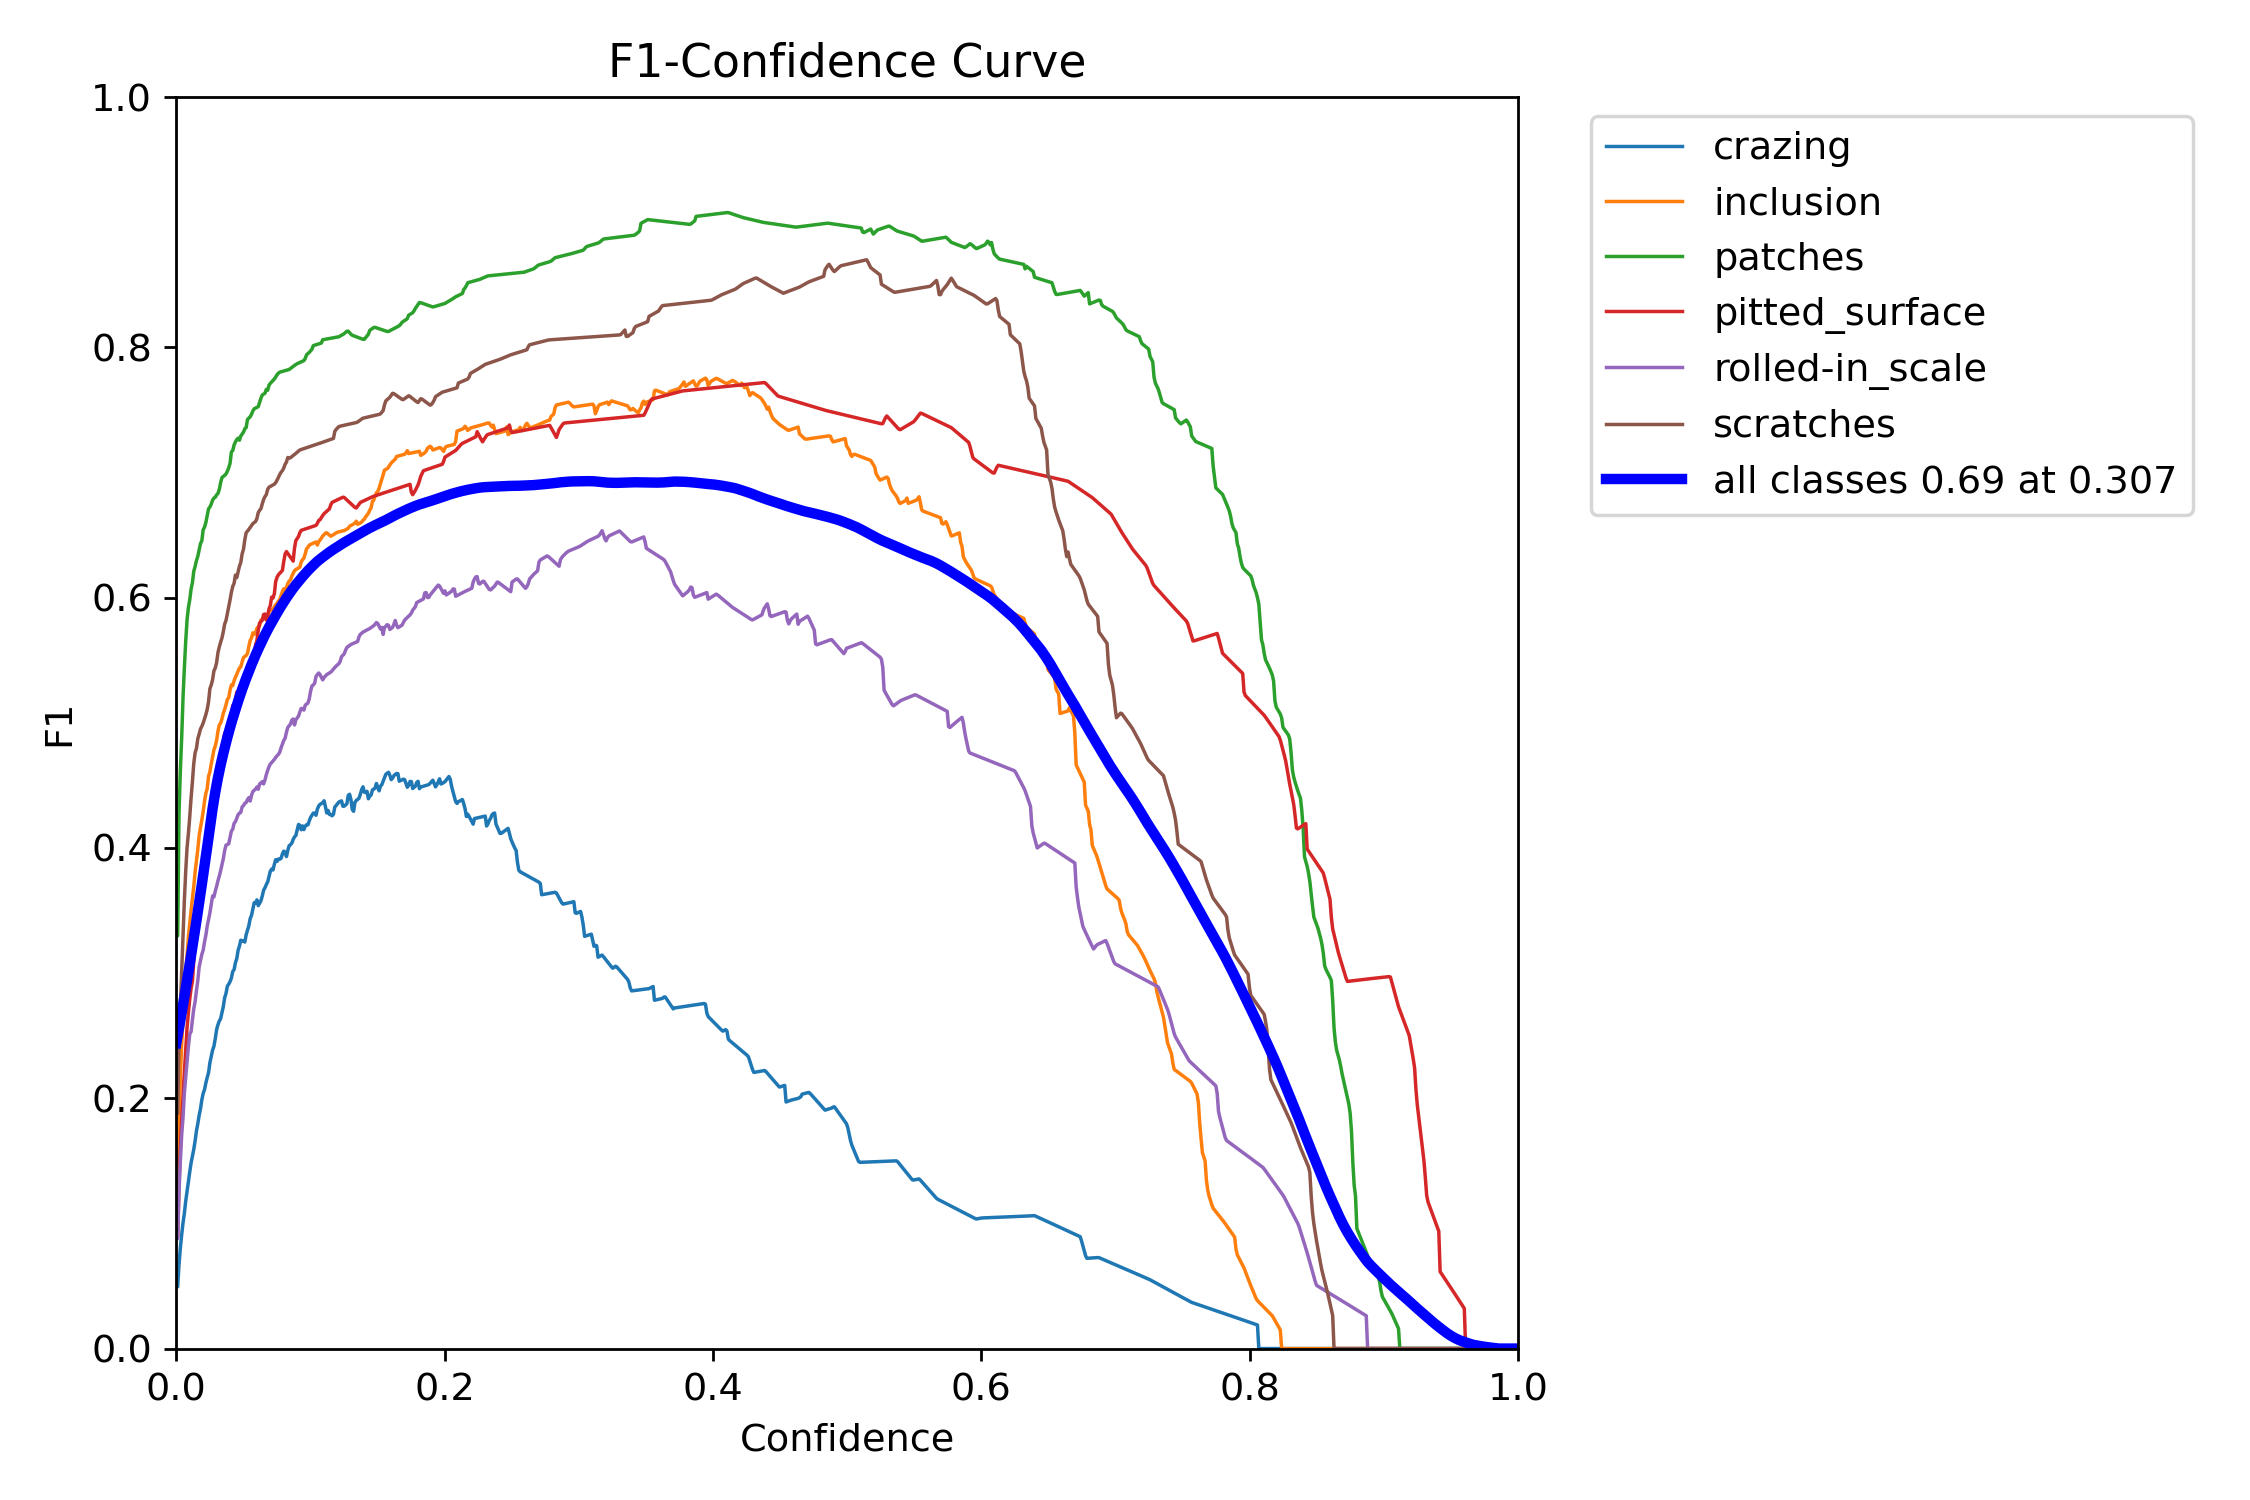

In [67]:
Image(filename=f'runs/detect/yolov8_with_fpn/F1_curve.png', width=600)

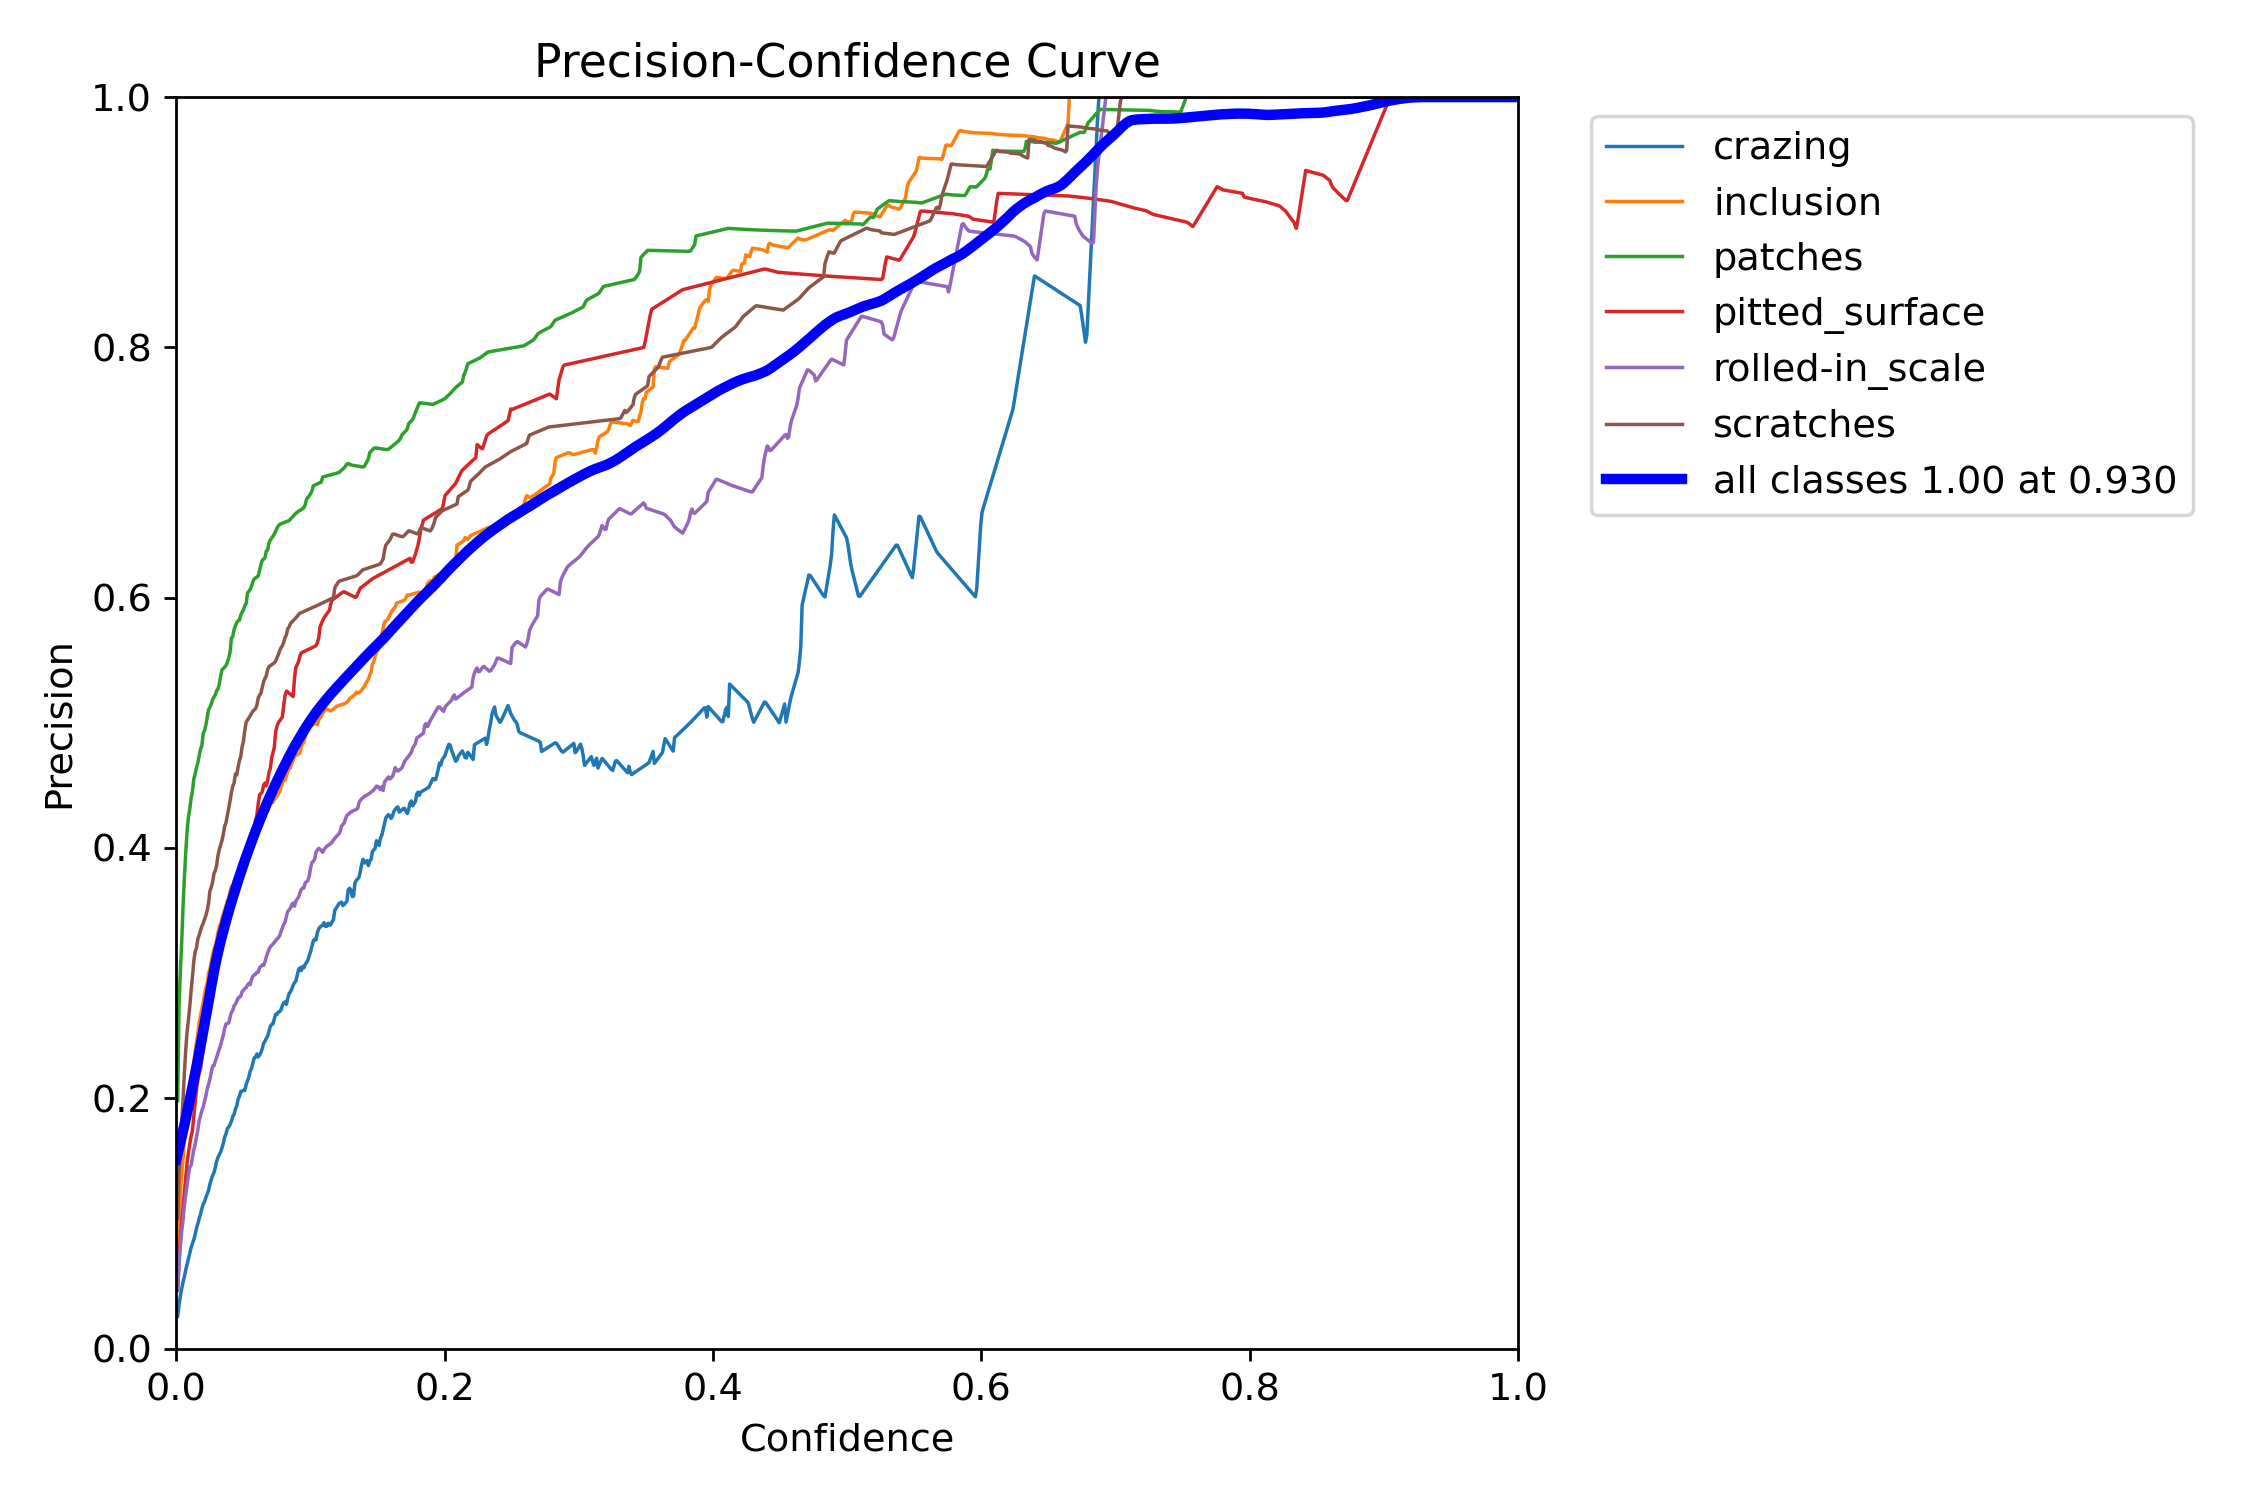

In [68]:
Image(filename=f'runs/detect/yolov8_with_fpn/P_curve.png', width=600)

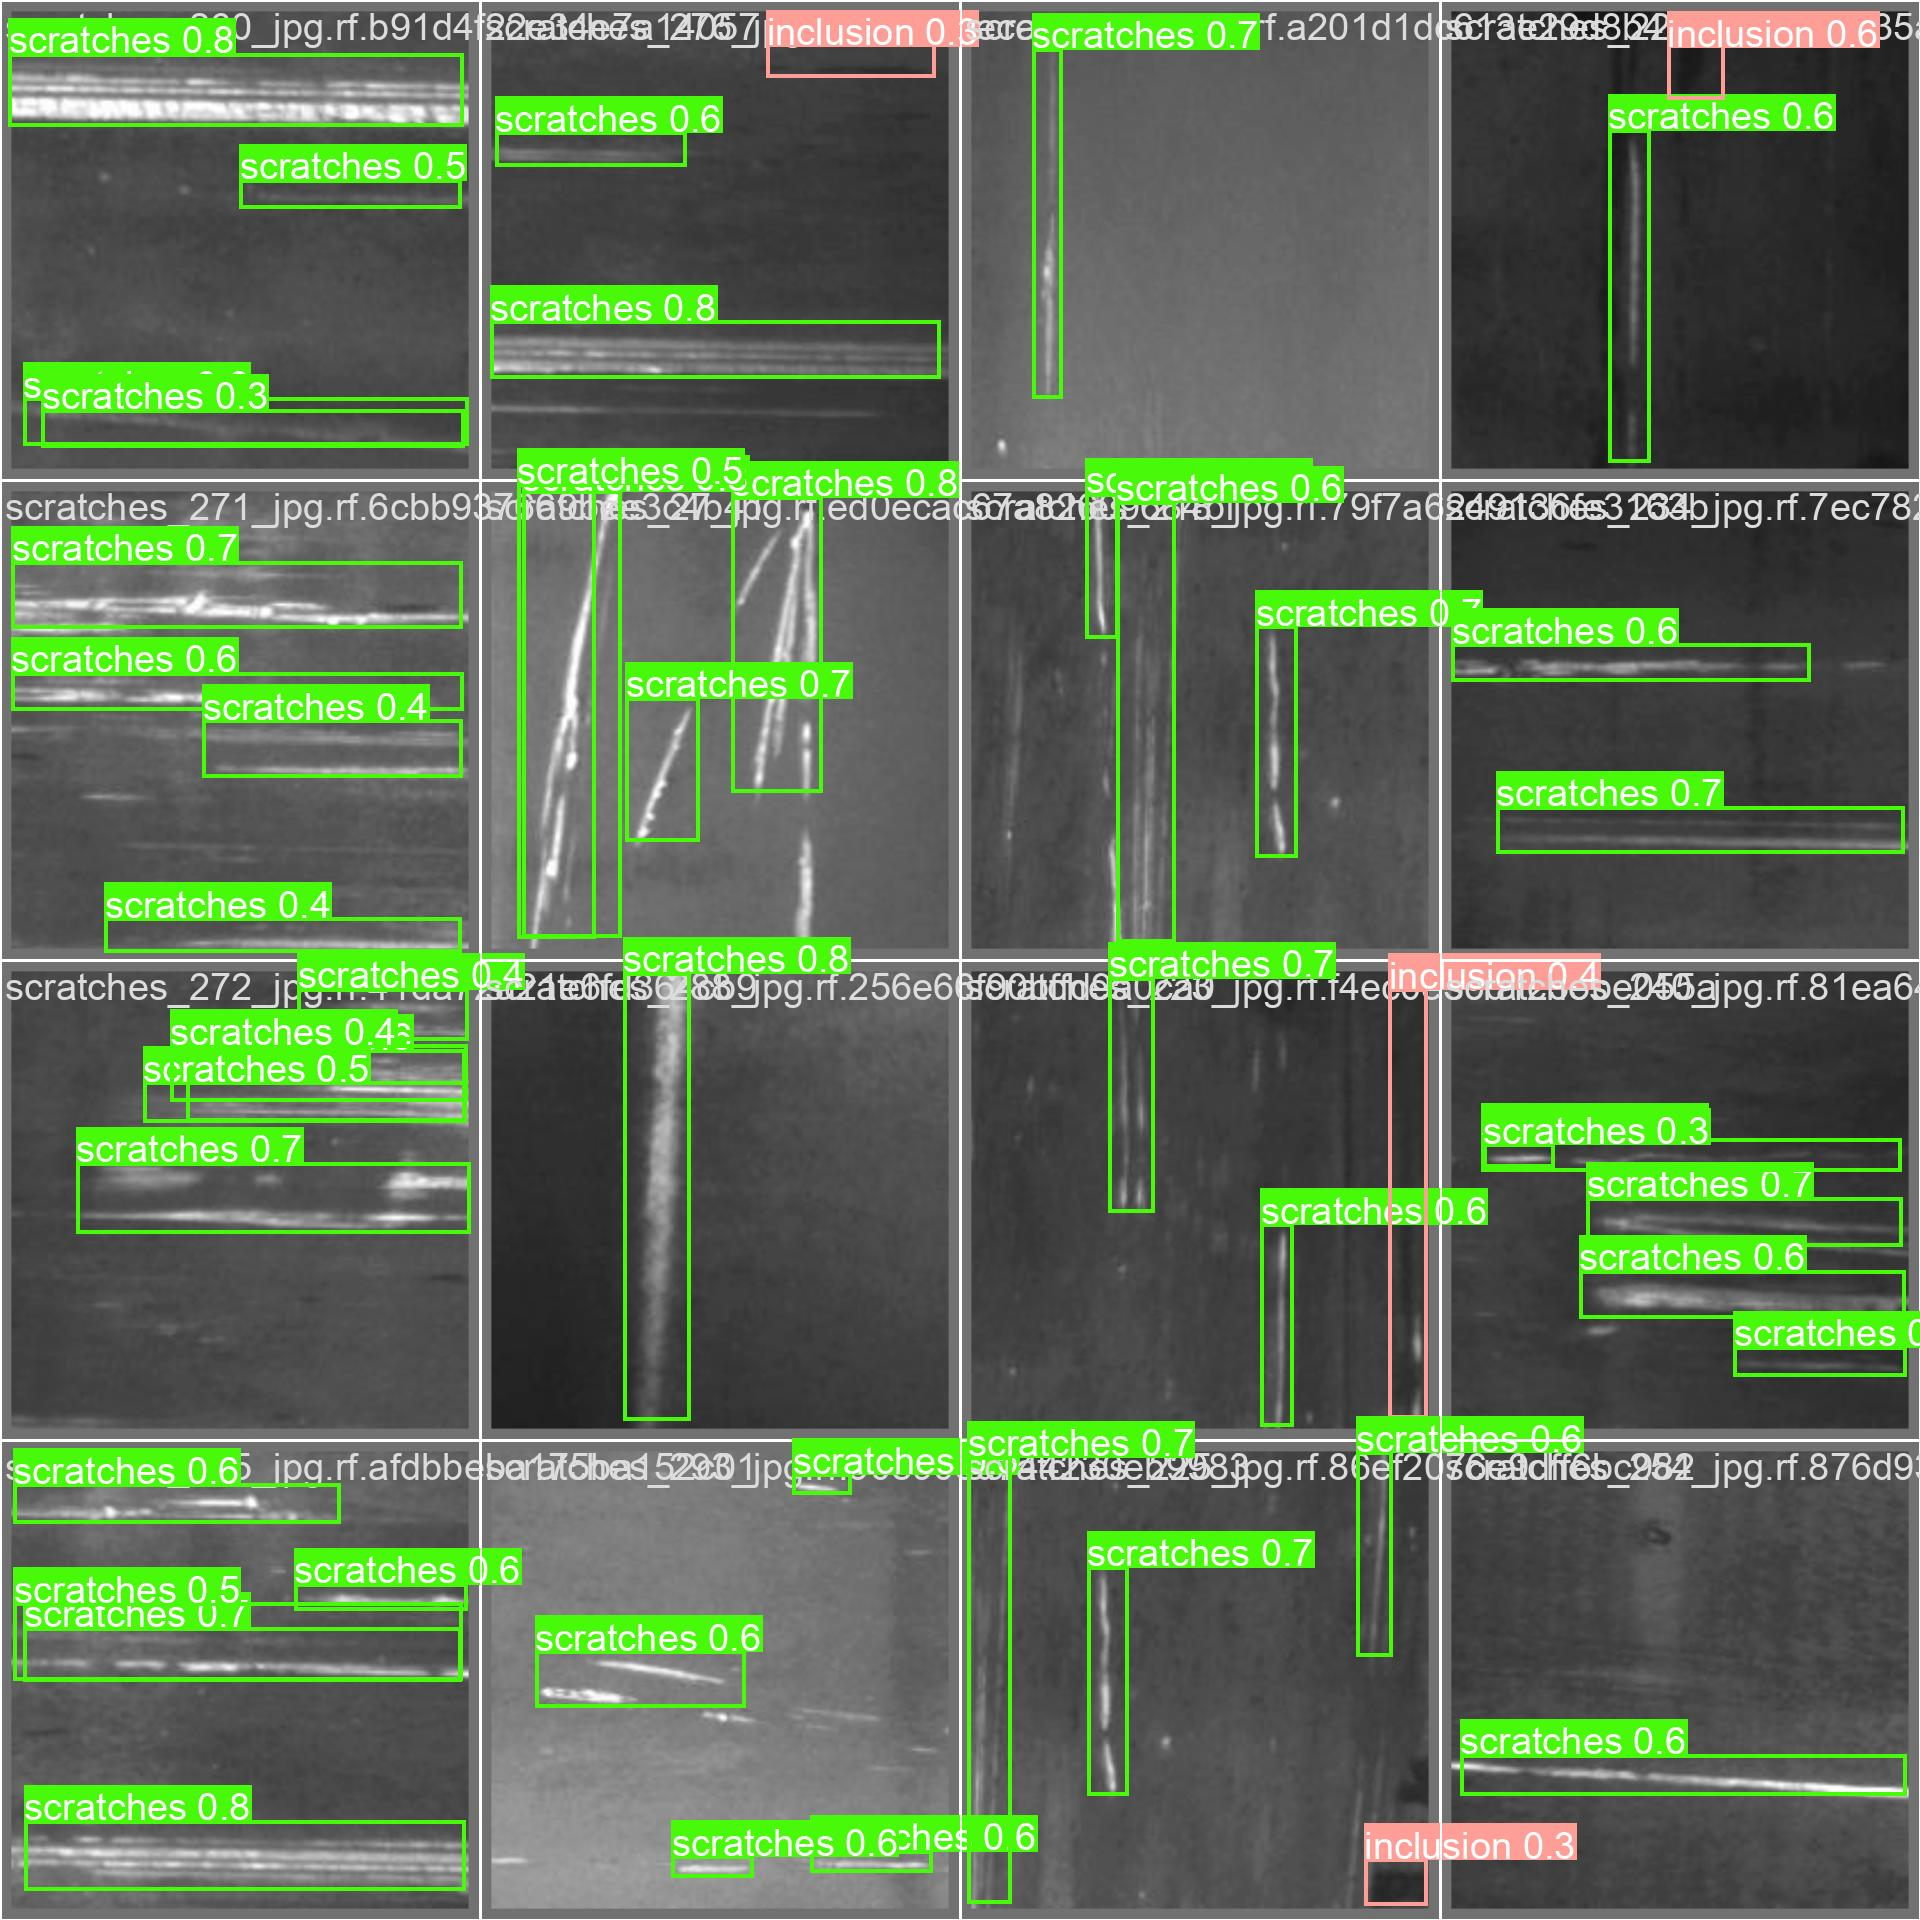

In [69]:
Image(filename=f'runs/detect/yolov8_with_fpn/val_batch0_pred.jpg', width=600)

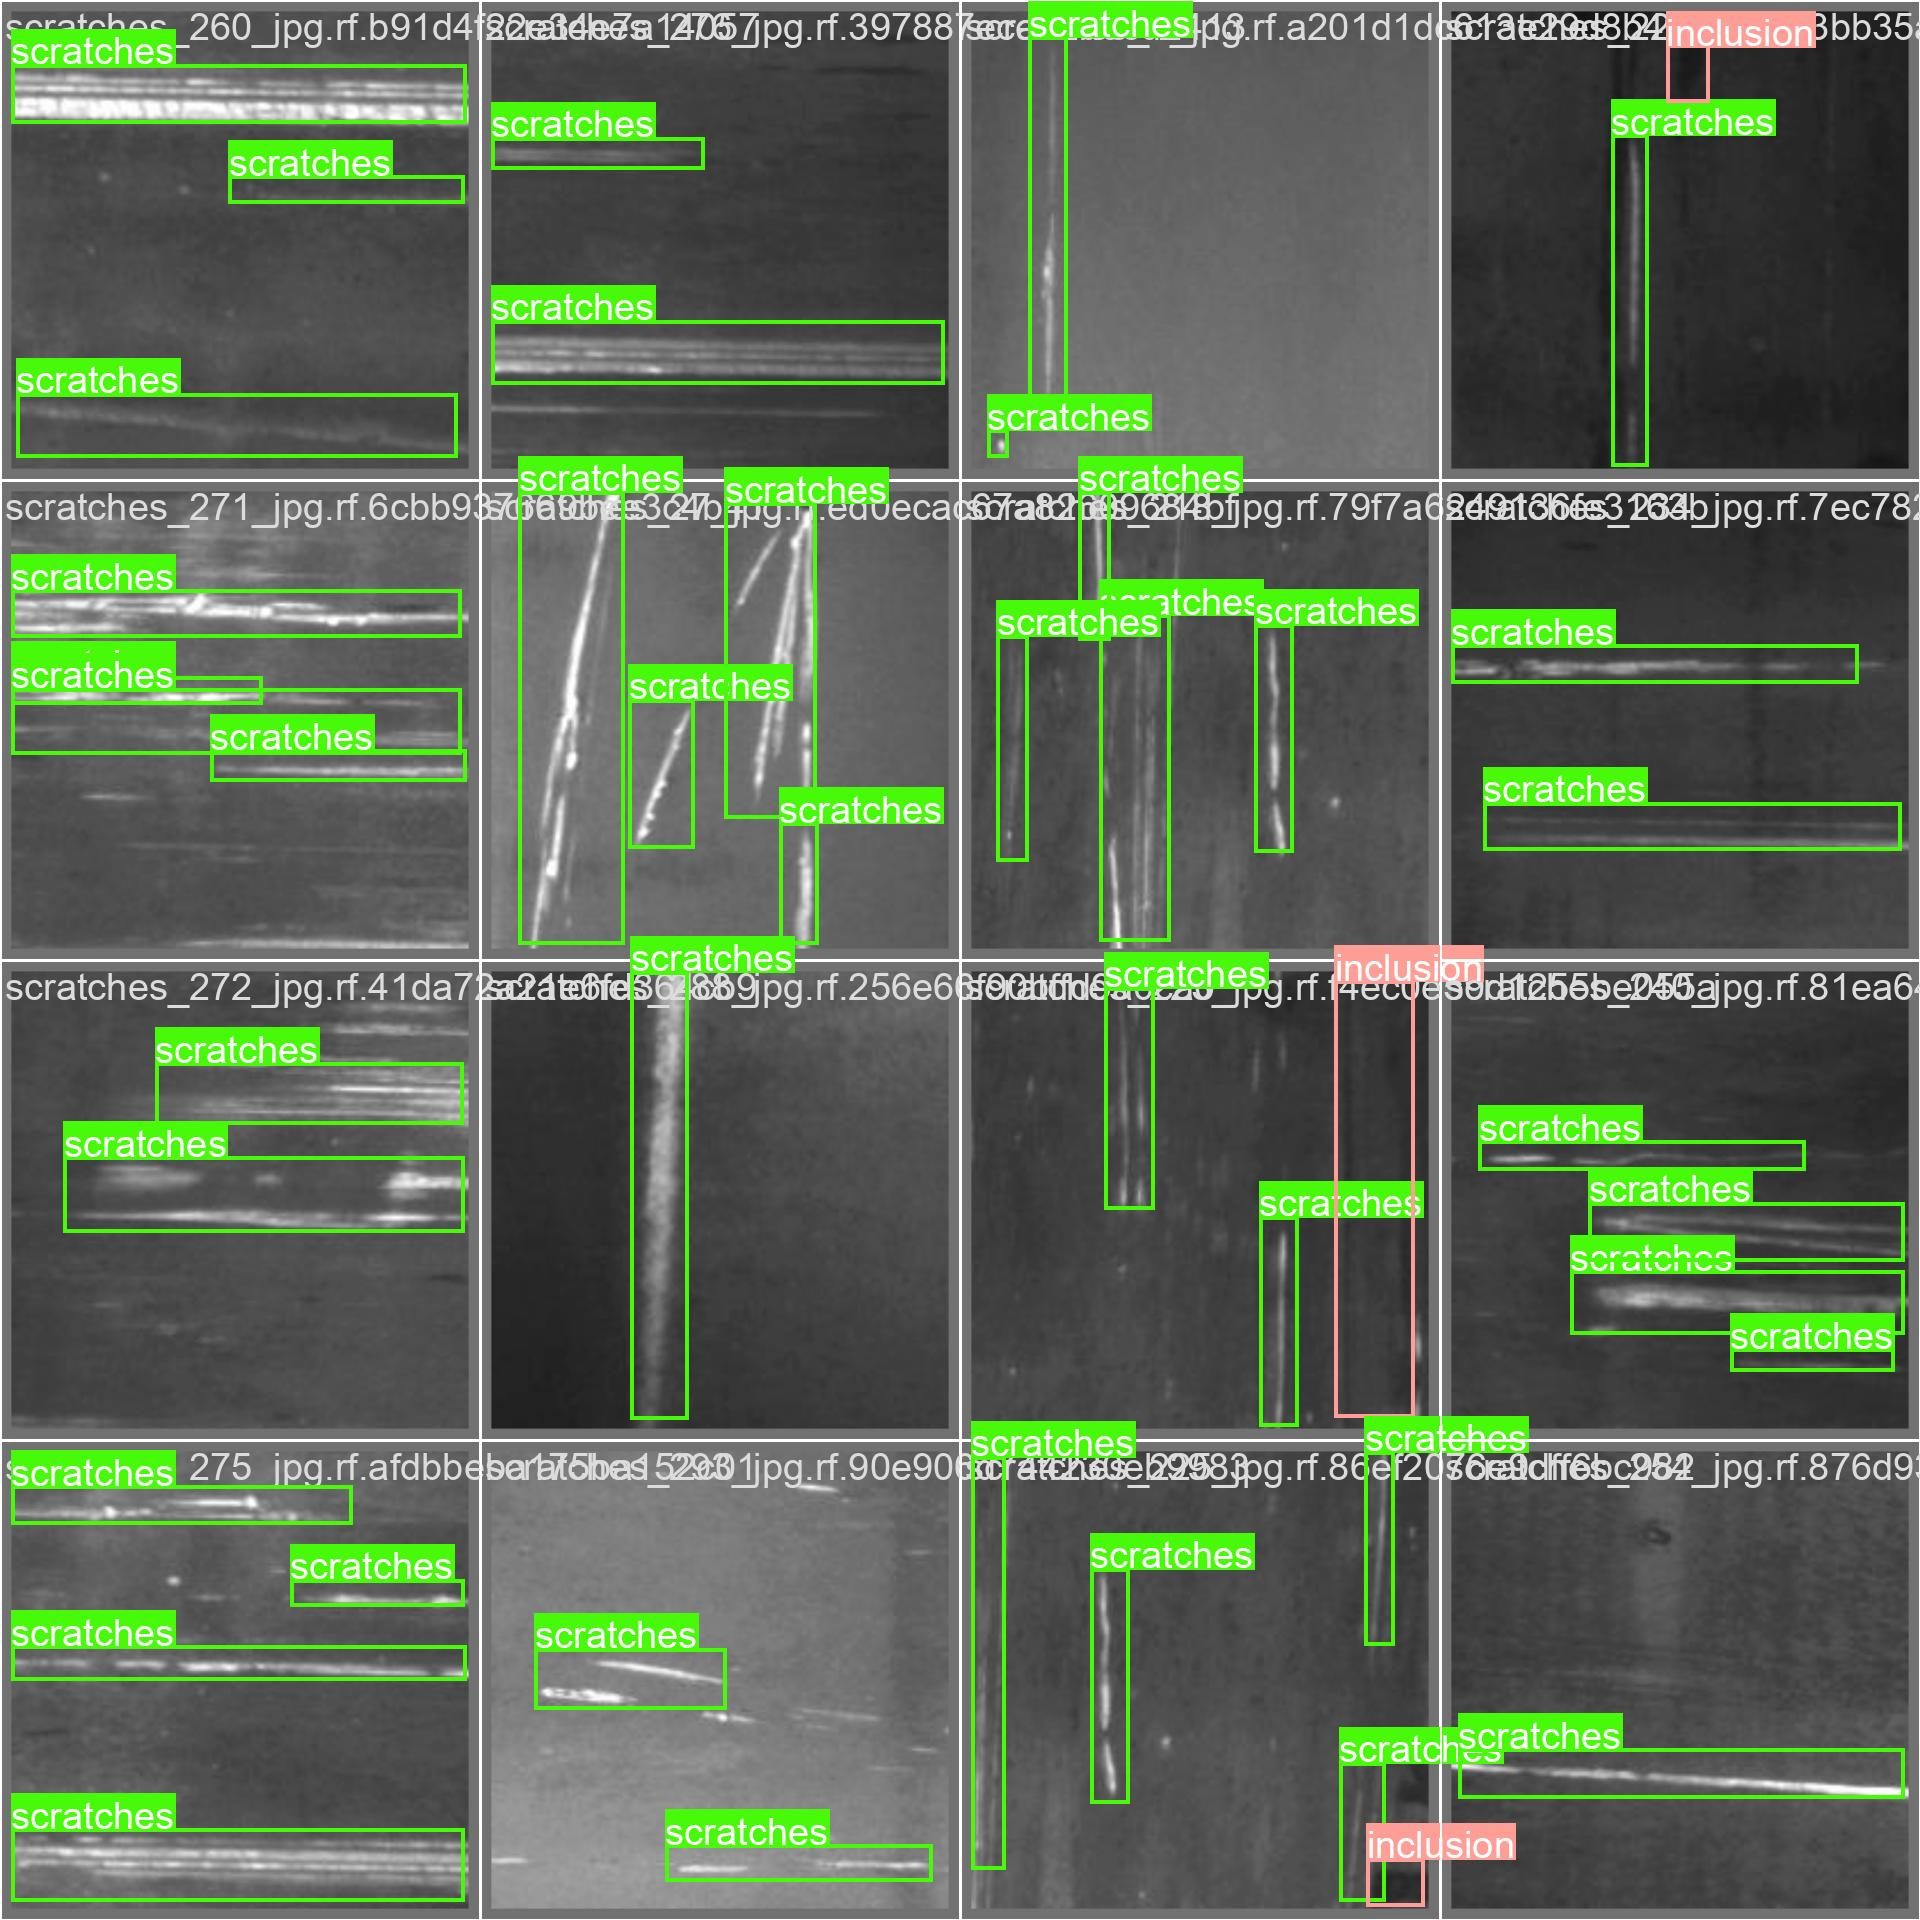

In [71]:
Image(filename=f'runs/detect/yolov8_with_fpn/val_batch0_labels.jpg', width=600)

In [75]:
# Export the trained model
model.export(format="onnx")

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)

PyTorch: starting from 'runs/detect/yolov8_with_fpn/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 9.9s, saved as 'runs/detect/yolov8_with_fpn/weights/best.onnx' (98.8 MB)

Export complete (11.8s)
Results saved to /content/Steel-Surface-Defect-Detection-1/runs/detect/yolov8_with_fpn/weights
Predict:         yolo predict task=detect model=runs/detect/yolov8_with_fpn/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/yo

'runs/detect/yolov8_with_fpn/weights/best.onnx'

In [83]:
from google.colab import files
import shutil

# Compress the folder into a ZIP file
shutil.make_archive('/content/Steel-Surface-Defect-Detection-1/runs', 'zip', '/content/Steel-Surface-Defect-Detection-1/runs')

# Download the ZIP file
files.download('/content/Steel-Surface-Defect-Detection-1/runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>